<a href="https://colab.research.google.com/github/harshavardhangadila/Transformers-and-NLP/blob/main/Keras%20NLP%20Tasks/Inference_with_a_Pretrained_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q keras-nlp


In [8]:
import keras_nlp
import tensorflow as tf
import numpy as np
import time

In [4]:
# Load the pretrained BERT classifier from keras-nlp
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en",
    num_classes=2  # Binary classification (e.g., sentiment)
)


In [5]:
sample_texts = [
    "What an incredible performance. The actors were phenomenal.",
    "Terrible script and poor editing. Not worth watching.",
    "A heartwarming story with great visuals.",
    "Too slow and uninteresting. I nearly fell asleep.",
    "One of the best experiences I’ve had in a theater.",
    "Mediocre at best. It didn’t live up to the hype.",
    "An emotional rollercoaster that kept me hooked.",
    "I regret spending money on this. A complete disaster.",
    "Nothing special, just your average film.",
    "The cinematography was stunning, truly artistic.",
    "Bad acting and a predictable plot.",
    "It had some good moments, but overall forgettable.",
    "Absolutely loved the soundtrack and direction!",
    "The plot made no sense and the pacing was off.",
    "Visually impressive, but lacked emotional depth.",
    "I enjoyed it far more than I expected to.",
    "Disappointing. I was expecting so much more."
]

In [6]:
# Run prediction on sample texts
logits = classifier.predict(sample_texts, verbose=0)
print("Raw model logits:\n", logits)


Raw model logits:
 [[-0.16812268  0.32992578]
 [-0.23673245  0.38619468]
 [-0.20055334  0.3496209 ]
 [-0.2763173   0.30998188]
 [-0.21509306  0.33633024]
 [-0.24929295  0.28370327]
 [-0.17215928  0.37619805]
 [-0.27972597  0.3179496 ]
 [-0.17835076  0.29605532]
 [-0.08685003  0.31502318]
 [-0.18827802  0.35564148]
 [-0.20339593  0.26035306]
 [-0.18928616  0.3445916 ]
 [-0.17213172  0.2776045 ]
 [-0.16250262  0.36365166]
 [-0.27695966  0.23781598]
 [-0.27029163  0.32426724]]


In [9]:
def classify_text(text):
    pred = classifier.predict([text], verbose=0)
    prob = tf.nn.softmax(pred[0]).numpy()
    label = "Positive" if np.argmax(prob) == 1 else "Negative"
    return label, prob

print("\n--- Predictions ---")
for text in sample_texts:
    label, prob = classify_text(text)
    print(f"Text: {text}")
    print(f"Predicted Label: {label} | Probabilities: {prob}")
    print("-" * 60)


--- Predictions ---
Text: What an incredible performance. The actors were phenomenal.
Predicted Label: Positive | Probabilities: [0.3779994 0.6220006]
------------------------------------------------------------
Text: Terrible script and poor editing. Not worth watching.
Predicted Label: Positive | Probabilities: [0.349116   0.65088403]
------------------------------------------------------------
Text: A heartwarming story with great visuals.
Predicted Label: Positive | Probabilities: [0.36582398 0.634176  ]
------------------------------------------------------------
Text: Too slow and uninteresting. I nearly fell asleep.
Predicted Label: Positive | Probabilities: [0.35748443 0.64251554]
------------------------------------------------------------
Text: One of the best experiences I’ve had in a theater.
Predicted Label: Positive | Probabilities: [0.36553428 0.63446575]
------------------------------------------------------------
Text: Mediocre at best. It didn’t live up to the hype.


In [10]:
custom_text_1 = "I'm extremely disappointed with the quality. Totally not worth it."
custom_text_2 = "Surprisingly good! I didn’t expect it to work so well."
custom_text_3 = "It does the job, but there's nothing impressive about it."
custom_text_4 = "Absolutely horrible experience. I want a refund."
custom_text_5 = "Solid performance, decent price, and fast delivery. Satisfied overall."
for i, text in enumerate([custom_text_1, custom_text_2, custom_text_3, custom_text_4, custom_text_5], 1):
    label, prob = classify_text(text)
    print(f"\nCustom Text {i}: {text}")
    print(f"Predicted Label: {label} | Probabilities: {prob}")




Custom Text 1: I'm extremely disappointed with the quality. Totally not worth it.
Predicted Label: Positive | Probabilities: [0.36106217 0.6389378 ]

Custom Text 2: Surprisingly good! I didn’t expect it to work so well.
Predicted Label: Positive | Probabilities: [0.36365515 0.63634485]

Custom Text 3: It does the job, but there's nothing impressive about it.
Predicted Label: Positive | Probabilities: [0.38641268 0.6135874 ]

Custom Text 4: Absolutely horrible experience. I want a refund.
Predicted Label: Positive | Probabilities: [0.35961422 0.6403858 ]

Custom Text 5: Solid performance, decent price, and fast delivery. Satisfied overall.
Predicted Label: Positive | Probabilities: [0.34313852 0.6568615 ]


In [11]:
print("\n--- Model Summary ---")
classifier.summary()


--- Model Summary ---


Preprocessor: "bert_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                                │                       Vocab size: 28,996 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 768), (None,      │     108,310,272 │ padding_mask[0][0],        │
│                               │ None, 768)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 768)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 108,311,810 (413.18 MB)

 Trainable params: 108,311,810 (413.18 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
start = time.time()
_ = classifier.predict(sample_texts, verbose=0)
end = time.time()

print(f"\nInference time for {len(sample_texts)} samples: {end - start:.4f} seconds")


Inference time for 17 samples: 2.0132 seconds


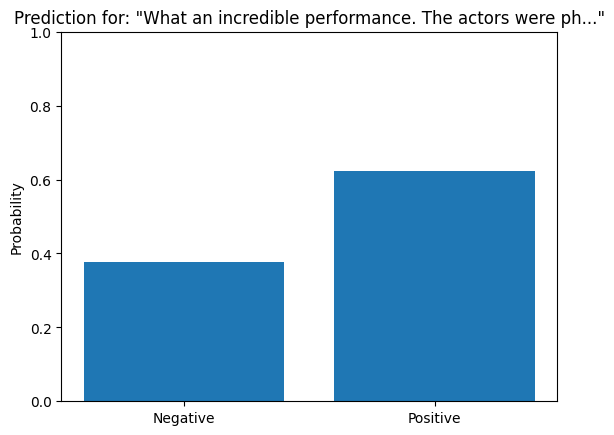

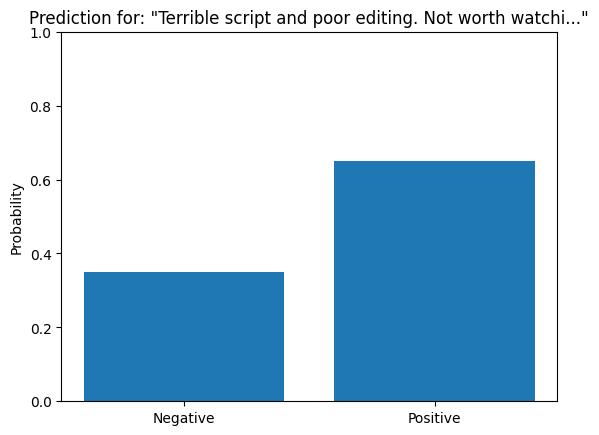

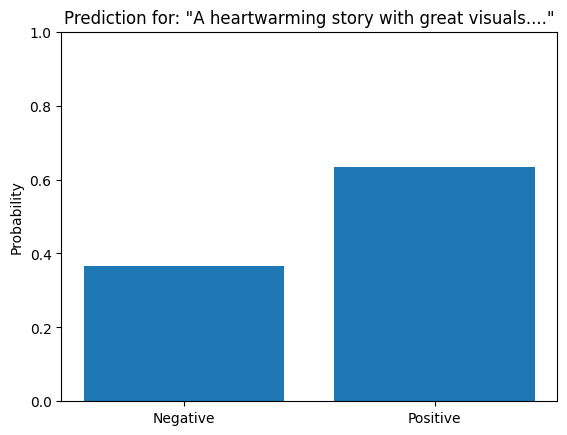

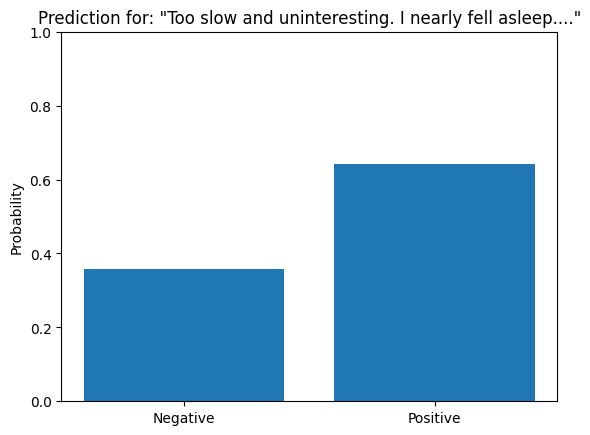

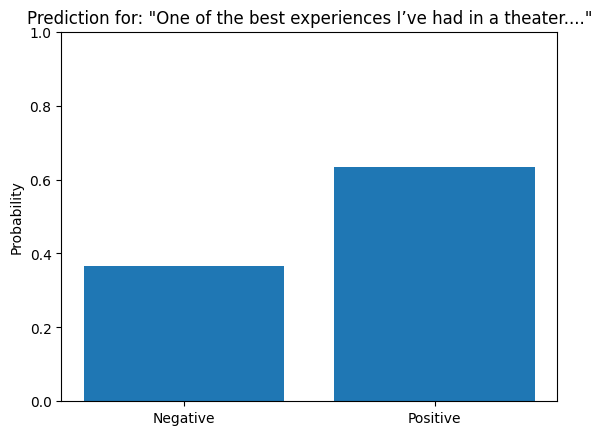

In [13]:
import matplotlib.pyplot as plt

def plot_probabilities(texts):
    for text in texts:
        _, prob = classify_text(text)
        labels = ["Negative", "Positive"]
        plt.figure()
        plt.bar(labels, prob)
        plt.title(f"Prediction for: \"{text[:50]}...\"")
        plt.ylabel("Probability")
        plt.ylim([0, 1])
        plt.show()

plot_probabilities(sample_texts[:5])

In [14]:
# Mini labeled dataset (text, expected label)
labeled_data = [
    ("I loved it so much!", 1),
    ("Worst thing ever created.", 0),
    ("It was alright, nothing special.", 0),
    ("Fantastic performance!", 1),
    ("Not great, not terrible.", 0)
]

# Evaluate accuracy
correct = 0
for text, expected in labeled_data:
    pred = classifier.predict([text], verbose=0)
    pred_label = np.argmax(tf.nn.softmax(pred[0]).numpy())
    correct += int(pred_label == expected)

accuracy = correct / len(labeled_data)
print(f"Accuracy on mini labeled set: {accuracy:.2%}")

Accuracy on mini labeled set: 40.00%


In [15]:
def batch_classify(text_list):
    preds = classifier.predict(text_list, verbose=0)
    probs = tf.nn.softmax(preds).numpy()
    labels = ["Negative", "Positive"]
    results = []
    for i, prob in enumerate(probs):
        label = labels[np.argmax(prob)]
        results.append((text_list[i], label, prob))
    return results

# Example usage
results = batch_classify(sample_texts)
for text, label, prob in results[:5]:
    print(f"{label} ({prob}): {text}")

Positive ([0.3779994 0.6220006]): What an incredible performance. The actors were phenomenal.
Positive ([0.349116 0.650884]): Terrible script and poor editing. Not worth watching.
Positive ([0.36582398 0.634176  ]): A heartwarming story with great visuals.
Positive ([0.35748443 0.64251554]): Too slow and uninteresting. I nearly fell asleep.
Positive ([0.36553428 0.63446575]): One of the best experiences I’ve had in a theater.
